# Project 2 (Alireza Rashidi) MLP for CIFAR data set:

In [60]:
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [61]:
file = '../CIFAR10/cifar-10-batches-py/data_batch_1'

In [62]:
data_batch1 = unpickle(file)
data_batch1.keys()   # printing every batch file dict information.

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [63]:
# printing datas:
print('data values for batch 1:\n')
trainBatch1_X = data_batch1['data']    # numpy array.
print(trainBatch1_X)
print('\nlabels for batch 1:\n')
trainBatch1_y = np.array(data_batch1['labels'])   # class-label vector.
print(trainBatch1_y)

data values for batch 1:

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]

labels for batch 1:

[6 9 9 ... 1 1 5]


In [64]:
print('shape of batch 1:')
trainBatch1_X.shape     # (10000, 3072) => 10000 sampels each ( ((32 * 32)) * 3 ) (3 is for RGB channels)

shape of batch 1:


(10000, 3072)

##### an RGB image is basically a MxNx3 array of colour pixel, where each colour pixel is associated with three values which correspond to red, blue and green colour component of RGB image at a specified spatial location.

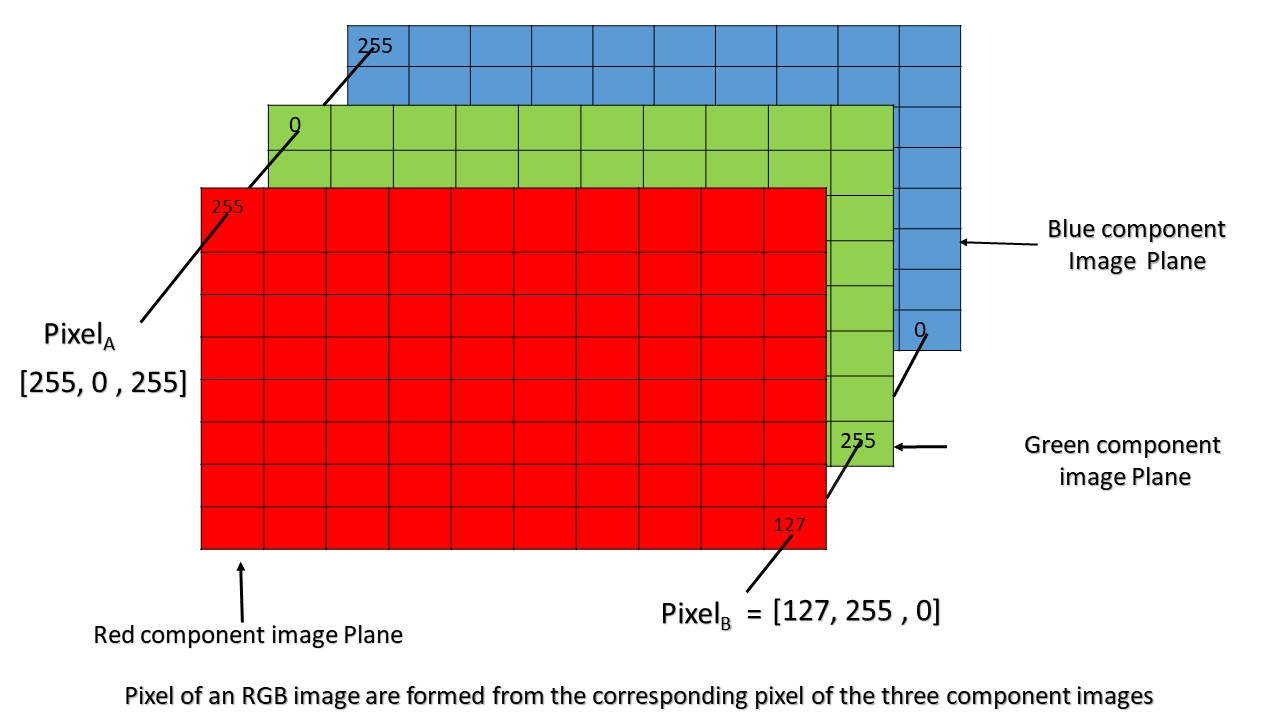

### Colour planes of RGB image:
### Consider an RGB image array ‘I’ then,
       I(:, :, 1) represents the Red colour plane of the RGB image
       I(:, :, 2) represents the Green colour plane of the RGB image
       I(:, :, 3) represents the Blue colour plane of the RGB image

## Loading Training data set from batch files:

In [65]:
FILE_NAME = 'data_batch_'    # base file name (is data_batch)
filePath = '../CIFAR10/cifar-10-batches-py/'

data_batch_lst = []    # will contain the dicts of training data.

data_batch_lst = [unpickle("".join([filePath, FILE_NAME, str(i + 1)])) for i in range (0, 5)]
data_batch_lst

[{'batch_label': 'training batch 1 of 5',
  'labels': [6,
   9,
   9,
   4,
   1,
   1,
   2,
   7,
   8,
   3,
   4,
   7,
   7,
   2,
   9,
   9,
   9,
   3,
   2,
   6,
   4,
   3,
   6,
   6,
   2,
   6,
   3,
   5,
   4,
   0,
   0,
   9,
   1,
   3,
   4,
   0,
   3,
   7,
   3,
   3,
   5,
   2,
   2,
   7,
   1,
   1,
   1,
   2,
   2,
   0,
   9,
   5,
   7,
   9,
   2,
   2,
   5,
   2,
   4,
   3,
   1,
   1,
   8,
   2,
   1,
   1,
   4,
   9,
   7,
   8,
   5,
   9,
   6,
   7,
   3,
   1,
   9,
   0,
   3,
   1,
   3,
   5,
   4,
   5,
   7,
   7,
   4,
   7,
   9,
   4,
   2,
   3,
   8,
   0,
   1,
   6,
   1,
   1,
   4,
   1,
   8,
   3,
   9,
   6,
   6,
   1,
   8,
   5,
   2,
   9,
   9,
   8,
   1,
   7,
   7,
   0,
   0,
   6,
   9,
   1,
   2,
   2,
   9,
   2,
   6,
   6,
   1,
   9,
   5,
   0,
   4,
   7,
   6,
   7,
   1,
   8,
   1,
   1,
   2,
   8,
   1,
   3,
   3,
   6,
   2,
   4,
   9,
   9,
   5,
   4,
   3,
   6,
   7,
   4,
   6,
   8,
   5,
   5,


### Loading Label names for each class:

In [66]:
label_names = []
FILE_NAME = 'batches.meta'    # base file name (is data_batch)
label_names = unpickle("".join([filePath, FILE_NAME]))['label_names']
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Concatenate All Batches togather:

In [67]:
all_trainData_X = data_batch_lst[0]['data']
# for j in range (1, 5):
#     all_trainData = np.concatenate((all_trainData, data_batch_lst[j][b'data']))
all_trainData_y = data_batch_lst[0]['labels']

all_trainData_X = np.concatenate((all_trainData_X, data_batch_lst[1]['data'], 
                                 data_batch_lst[2]['data'], data_batch_lst[3]['data'], data_batch_lst[4]['data']))

all_trainData_y = np.concatenate((all_trainData_y, data_batch_lst[1]['labels'], 
                                 data_batch_lst[2]['labels'], data_batch_lst[3]['labels'], data_batch_lst[4]['labels']))

print("All train feature data batches togather: ")
print(all_trainData_X)
print("\ntrain_X data shape: ", all_trainData_X.shape)

print("\nAll train labels togather: ")
print(all_trainData_y)
print("\ntrain_y data shape: ", all_trainData_y.shape)

All train feature data batches togather: 
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]

train_X data shape:  (50000, 3072)

All train labels togather: 
[6 9 9 ... 9 1 1]

train_y data shape:  (50000,)


## Visualization of some Images:

In [68]:
def re_ScaleData(dataX):
    return dataX.reshape(dataX.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)

In [69]:
import matplotlib
import matplotlib.pyplot as plt

wide_data = re_ScaleData(all_trainData_X)
all_trainData_X.shape

(50000, 3072)

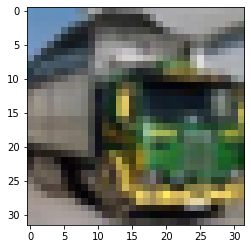

In [70]:
plt.imshow(wide_data[14])    # showing one of the images...
plt.show()

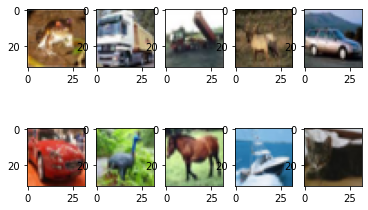

In [71]:
for i in range(0,10):    # showing 10 first images in train set.
    plt.subplot(2, 5, i+1)
    plt.imshow(wide_data[i])
plt.show()

In [72]:
print("\nLabel count in all train-set:\n")  
for class_label in range(0, 10):
    count = np.unique(all_trainData_y, return_counts=True)[1][class_label]
    print("".join(['Label counts of ',label_names[class_label],'(', str(class_label) ,'): ', str(count)]))
    
print("\nLabel count in every batch:")    
for batchNumber in range(0, 5):
    print("".join(['\nbatch number ', str(batchNumber + 1), ': ']))
    for class_label in range(0, 10):
        count = np.unique(all_trainData_y[batchNumber * 10000: 10000 + batchNumber * 10000], return_counts=True)[1][class_label]
        print("".join(['Label counts of ',label_names[class_label], '(', str(class_label) ,'): ', str(count)]))
    


Label count in all train-set:

Label counts of airplane(0): 5000
Label counts of automobile(1): 5000
Label counts of bird(2): 5000
Label counts of cat(3): 5000
Label counts of deer(4): 5000
Label counts of dog(5): 5000
Label counts of frog(6): 5000
Label counts of horse(7): 5000
Label counts of ship(8): 5000
Label counts of truck(9): 5000

Label count in every batch:

batch number 1: 
Label counts of airplane(0): 1005
Label counts of automobile(1): 974
Label counts of bird(2): 1032
Label counts of cat(3): 1016
Label counts of deer(4): 999
Label counts of dog(5): 937
Label counts of frog(6): 1030
Label counts of horse(7): 1001
Label counts of ship(8): 1025
Label counts of truck(9): 981

batch number 2: 
Label counts of airplane(0): 984
Label counts of automobile(1): 1007
Label counts of bird(2): 1010
Label counts of cat(3): 995
Label counts of deer(4): 1010
Label counts of dog(5): 988
Label counts of frog(6): 1008
Label counts of horse(7): 1026
Label counts of ship(8): 987
Label counts

## Data Preprocessing:

In [73]:
from tensorflow.keras.utils import to_categorical

def normalizeData(data):
    # min_val = np.min(data) => 0   (pixel with value zero in its channel.)
    # max_val = np.max(data) => 255   (pixel with value 255 in its channel.)
    # data = (data-min_val) / (max_val-min_val)
    return data / 255.

def oneHotEncode(data):
    return to_categorical(data)

def unison_shuffle(a, b):
    index = np.random.permutation(a.shape[0])
    return a[index], b[index]

In [74]:
# trainBatch1_X = re_ScaleData(trainBatch1_X)

trainBatch1_X, trainBatch1_y = unison_shuffle(trainBatch1_X, trainBatch1_y)
trainBatch1_X = normalizeData(trainBatch1_X)    # normalize the train data.
trainBatch1_y = oneHotEncode(trainBatch1_y)    # one-hot encoding

# printing 5 samples(each 32 * 32 * 3) from train.
print('normalized dataBatch1:\n', trainBatch1_X[:5])   
print('\none hot encoded lables:\n', trainBatch1_y[:5])

normalized dataBatch1:
 [[0.5372549  0.51372549 0.50196078 ... 0.16078431 0.09803922 0.09019608]
 [0.31372549 0.29803922 0.25882353 ... 0.17254902 0.15686275 0.16862745]
 [0.44313725 0.43529412 0.43921569 ... 0.82352941 0.82352941 0.83137255]
 [0.30980392 0.41568627 0.43137255 ... 0.52941176 0.52941176 0.45882353]
 [0.96078431 1.         0.99607843 ... 0.5372549  0.55686275 0.60392157]]

one hot encoded lables:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Creating train-set and validation-set from dataBatch1:

In [75]:
def train_validation_split(X, y, rate):
    
    threshold = int(trainBatch1_X.shape[0] * rate)
    
    train_X = X[: threshold]
    validation_X = X[threshold :]
    train_y = y[ : threshold]
    validation_y = y[threshold : ]
    
    return train_X, train_y, validation_X, validation_y

In [76]:
# we have large data, so we select 15 percent of data to be the validation-set.
train_X, train_y, validation_X, validation_y = train_validation_split(trainBatch1_X, trainBatch1_y, 0.85)

print("\nsplited validation_X data: \n", validation_X[ : 5])
print("\nsplited validation_y data:\n ", validation_y[ : 5])

print("\nsplited train_X data: \n", train_X[ : 5])
print("\nsplited train_y data:\n ", train_y[ : 5])


splited validation_X data: 
 [[0.6627451  0.67843137 0.6745098  ... 0.48235294 0.47843137 0.41568627]
 [1.         0.99215686 0.99607843 ... 0.62352941 0.6745098  0.96862745]
 [0.82352941 0.79607843 0.78039216 ... 0.97254902 0.98431373 1.        ]
 [0.83137255 0.77647059 0.72941176 ... 0.30980392 0.30980392 0.30588235]
 [1.         1.         0.98823529 ... 0.97254902 0.98431373 0.99607843]]

splited validation_y data:
  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

splited train_X data: 
 [[0.5372549  0.51372549 0.50196078 ... 0.16078431 0.09803922 0.09019608]
 [0.31372549 0.29803922 0.25882353 ... 0.17254902 0.15686275 0.16862745]
 [0.44313725 0.43529412 0.43921569 ... 0.82352941 0.82352941 0.83137255]
 [0.30980392 0.41568627 0.43137255 ... 0.52941176 0.52941176 0.45882353]
 [0.96078431 1.         0.99607843 ... 0.5372549  0.55686275 0.60392157]]

splited train_y 

## Test models:

In [77]:
import matplotlib.pyplot as plt

def create_neural_Model(num_layer, size_layers, activation_func, dim):    # creating nerual model using some given parameters.
    model = Sequential()
    if num_layer > 0:
        model.add(Dense(size_layers[0], activation = activation_func[0], input_dim = dim))
   
        for i in range (1, num_layer):
            model.add(Dense(size_layers[i], activation = activation_func[i]))   # input layer + first hidden layer
        return model
    else:
        return None

def learningCurve_plot(hs, epochs, loss, model_name):    # ploting learining curve plot for created model.
    if loss:
        plt.plot(np.arange(0, epochs), hs.history["loss"], label="train_loss")
        plt.plot(np.arange(0, epochs), hs.history["val_loss"], label="val_loss")
        plt.title(" ".join(["Learning curve loss", model_name]))
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    else:   
        plt.plot(np.arange(0, epochs), hs.history["accuracy"], label="train_acc")
        plt.plot(np.arange(0, epochs), hs.history["val_accuracy"], label="val_acc")
        plt.title(" ".join(["Learning curve accuracy", model_name]))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

def models_summary(lst):
    for i in range(0 , len(lst)):
        print("".join(['\nModel ', str(i + 1), ' summary: \n']))
        print(lst[i].summary())
        
def compileModels(lst, opt):    # compile list of givien models.
    for i in range(0 , len(lst)):
        lst[i].compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        
def trainModels(lst, ep, batch, train_X, train_y, validation):   # train list of givien models.
    
    hs_lst = []
    for i in range(0, len(lst)):
        print("".join(['\nModel ', str(i + 1), ' started training: \n']))
        hs = model_lst[i].fit(train_X, train_y, batch_size = batch, epochs = ep, validation_data = validation)
        hs_lst.append(hs)
        
    return hs_lst

### model parameters info class:

In [78]:
# this class stores some information for using in some model evaluation.
class Model_Info:
        def __init__(self, layers, neurons, activation_funcs, dim, opt, loss_func, metric, epochs, batch_size):
            self.layers = layers
            self.neurons = neurons
            self.activation_funcs = activation_funcs
            self.dim = dim
            self.opt = opt
            self.loss_func = loss_func
            self.metric = metric
            self.epochs = epochs
            self.batch_size = batch_size

### One layer with diffrent activation functions:

In [79]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

INPUT_DIM = 3072   # featurs of our problem.

model_lst = []
#---------------------- single layer models with diffrent activation functions.
neural_model1 = create_neural_Model(1, (10, ), ('relu',), INPUT_DIM)
model_lst.append(neural_model1)

neural_model2 = create_neural_Model(1, (10, ), ('sigmoid',), INPUT_DIM)
model_lst.append(neural_model2)

neural_model3 = create_neural_Model(1, (10, ), ('tanh',), INPUT_DIM)
model_lst.append(neural_model3)

neural_model4 = create_neural_Model(1, (10, ), ('softplus',), INPUT_DIM)
model_lst.append(neural_model4)

neural_model5 = create_neural_Model(1, (10, ), ('softsign',), INPUT_DIM)
model_lst.append(neural_model5)

neural_model6 = create_neural_Model(1, (10, ), ('selu',), INPUT_DIM)
model_lst.append(neural_model6)

neural_model7 = create_neural_Model(1, (10, ), ('elu',), INPUT_DIM)
model_lst.append(neural_model7)

neural_model8 = create_neural_Model(1, (10, ), ('softmax',), INPUT_DIM)
model_lst.append(neural_model8)

neural_model9 = create_neural_Model(1, (10, ), ('linear',), INPUT_DIM)
model_lst.append(neural_model9)

In [80]:
models_summary(model_lst)


Model 1 summary: 

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None

Model 2 summary: 

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None

Model 3 summary: 

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 10)                30730 

In [81]:
# neural_model8.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

opt = SGD(learning_rate=0.0001)
compileModels(model_lst, opt)

In [82]:
NUM_EPOCHS = 30
BATCH_SIZE = 10

history_lst = []
hs_lst = trainModels(model_lst, NUM_EPOCHS, BATCH_SIZE, train_X, train_y, (validation_X, validation_y))
# hs = neural_model8.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, validation_data = (validation_X, validation_y))


Model 1 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 5.0400 - accuracy: 0.1016 - val_loss: 4.8216 - val_accuracy: 0.1020
Epoch 2/30
850/850 [==============================] - 1s 1ms/step - loss: 4.8261 - accuracy: 0.1056 - val_loss: 4.8010 - val_accuracy: 0.1187
Epoch 3/30
850/850 [==============================] - 1s 1ms/step - loss: 4.8096 - accuracy: 0.1401 - val_loss: 4.7878 - val_accuracy: 0.1560
Epoch 4/30
850/850 [==============================] - 1s 1ms/step - loss: 4.8368 - accuracy: 0.1304 - val_loss: 4.8306 - val_accuracy: 0.1060
Epoch 5/30
850/850 [==============================] - 1s 1ms/step - loss: 4.8310 - accuracy: 0.1012 - val_loss: 4.7994 - val_accuracy: 0.1120
Epoch 6/30
850/850 [==============================] - 1s 1ms/step - loss: 4.8066 - accuracy: 0.1188 - val_loss: 4.7835 - val_accuracy: 0.1553
Epoch 7/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7927 - accuracy: 0.1620 - val_loss: 4.7733 

850/850 [==============================] - 1s 1ms/step - loss: 1.9088 - accuracy: 0.3468 - val_loss: 1.9218 - val_accuracy: 0.3327
Epoch 29/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9045 - accuracy: 0.3453 - val_loss: 1.9217 - val_accuracy: 0.3300
Epoch 30/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9010 - accuracy: 0.3500 - val_loss: 1.9173 - val_accuracy: 0.3487

Model 3 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 6.9195 - accuracy: 0.0935 - val_loss: 7.0219 - val_accuracy: 0.0960
Epoch 2/30
850/850 [==============================] - 1s 1ms/step - loss: 7.8409 - accuracy: 0.0933 - val_loss: 7.6850 - val_accuracy: 0.0960
Epoch 3/30
850/850 [==============================] - 1s 1ms/step - loss: 7.9502 - accuracy: 0.0933 - val_loss: 7.6629 - val_accuracy: 0.0960
Epoch 4/30
850/850 [==============================] - 1s 1ms/step - loss: 7.8379 - accuracy: 0.0933 - val_loss: 7.5015 - val_acc

850/850 [==============================] - 1s 1ms/step - loss: 1.9634 - accuracy: 0.3120 - val_loss: 1.9642 - val_accuracy: 0.3147
Epoch 26/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9580 - accuracy: 0.3159 - val_loss: 1.9614 - val_accuracy: 0.3153
Epoch 27/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9526 - accuracy: 0.3172 - val_loss: 1.9579 - val_accuracy: 0.3080
Epoch 28/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9470 - accuracy: 0.3220 - val_loss: 1.9515 - val_accuracy: 0.3127
Epoch 29/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9424 - accuracy: 0.3212 - val_loss: 1.9468 - val_accuracy: 0.3247
Epoch 30/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9375 - accuracy: 0.3216 - val_loss: 1.9436 - val_accuracy: 0.3193

Model 5 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 3.6973 - accuracy: 0.0978 - val_loss: 3.4403 - val_

850/850 [==============================] - 1s 1ms/step - loss: 8.7167 - accuracy: 0.1302 - val_loss: 8.7391 - val_accuracy: 0.1160
Epoch 23/30
850/850 [==============================] - 1s 1ms/step - loss: 8.7050 - accuracy: 0.1318 - val_loss: 8.7175 - val_accuracy: 0.1160
Epoch 24/30
850/850 [==============================] - 1s 1ms/step - loss: 8.7045 - accuracy: 0.1340 - val_loss: 8.8995 - val_accuracy: 0.1160
Epoch 25/30
850/850 [==============================] - 1s 1ms/step - loss: 8.7542 - accuracy: 0.1325 - val_loss: 8.8906 - val_accuracy: 0.1187
Epoch 26/30
850/850 [==============================] - 1s 1ms/step - loss: 8.4489 - accuracy: 0.1340 - val_loss: 8.7975 - val_accuracy: 0.1173
Epoch 27/30
850/850 [==============================] - 1s 1ms/step - loss: 8.8352 - accuracy: 0.1321 - val_loss: 8.7061 - val_accuracy: 0.1153
Epoch 28/30
850/850 [==============================] - 1s 1ms/step - loss: 8.8575 - accuracy: 0.1293 - val_loss: 8.7794 - val_accuracy: 0.1160
Epoch 29/30

850/850 [==============================] - 1s 1ms/step - loss: 1.9609 - accuracy: 0.3201 - val_loss: 1.9630 - val_accuracy: 0.3193
Epoch 20/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9551 - accuracy: 0.3239 - val_loss: 1.9549 - val_accuracy: 0.3167
Epoch 21/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9490 - accuracy: 0.3293 - val_loss: 1.9515 - val_accuracy: 0.3213
Epoch 22/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9431 - accuracy: 0.3289 - val_loss: 1.9473 - val_accuracy: 0.3247
Epoch 23/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9373 - accuracy: 0.3318 - val_loss: 1.9420 - val_accuracy: 0.3213
Epoch 24/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9324 - accuracy: 0.3324 - val_loss: 1.9346 - val_accuracy: 0.3353
Epoch 25/30
850/850 [==============================] - 1s 1ms/step - loss: 1.9278 - accuracy: 0.3398 - val_loss: 1.9324 - val_accuracy: 0.3280
Epoch 26/30

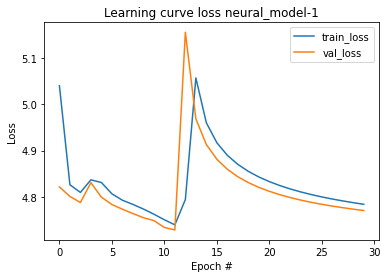

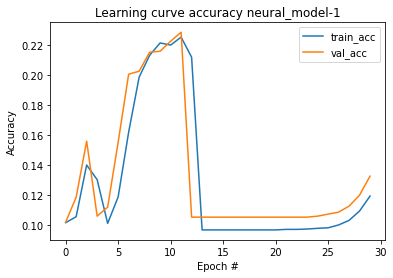

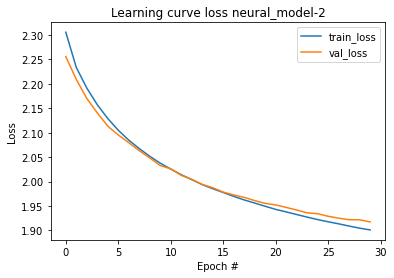

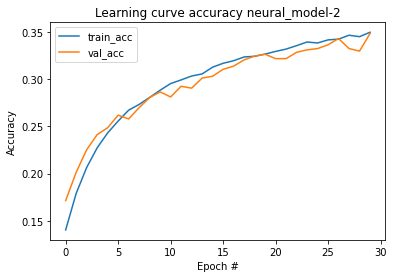

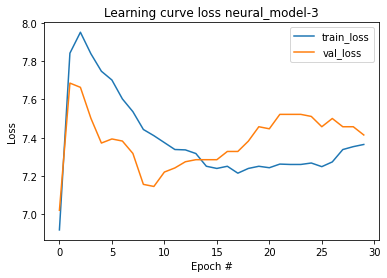

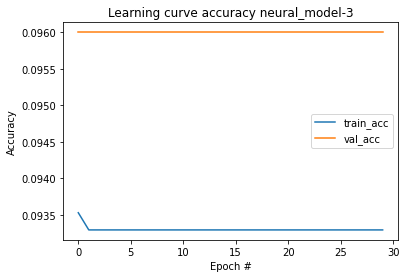

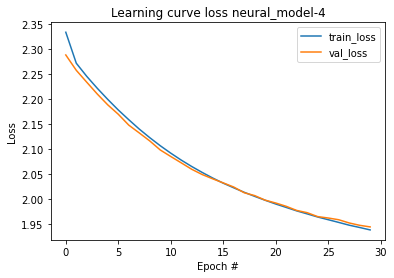

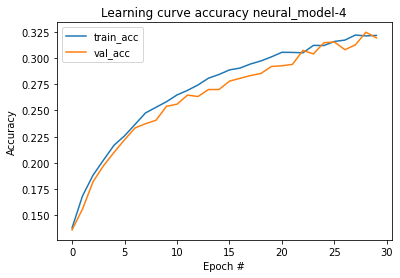

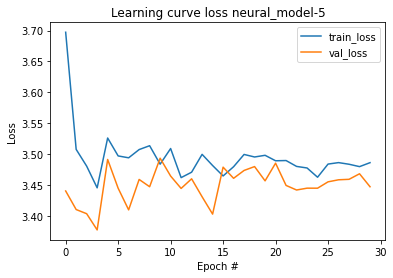

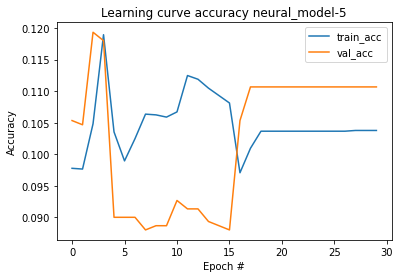

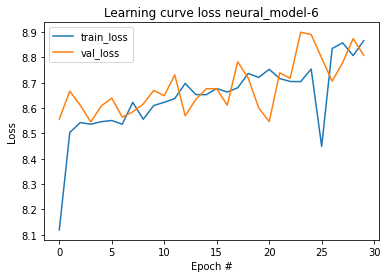

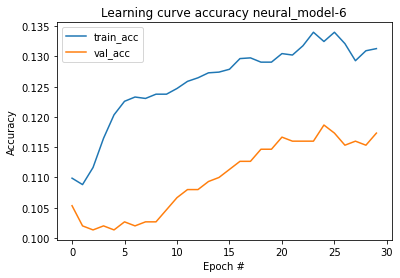

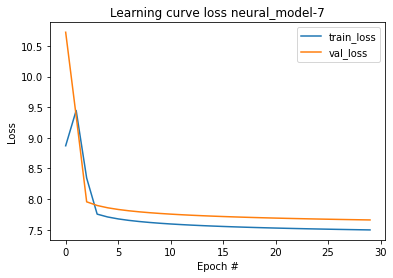

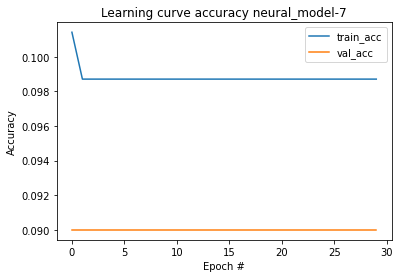

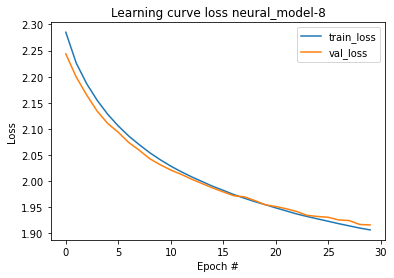

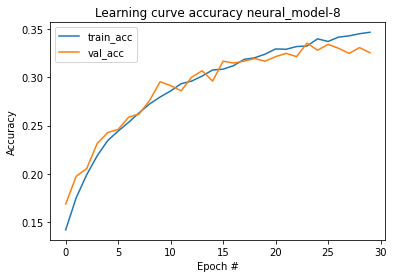

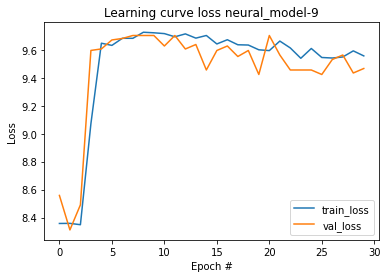

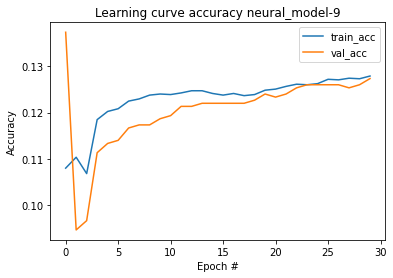

In [83]:
import matplotlib.pyplot as plt

for i in range (0, len(hs_lst)):
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, True, "".join(["neural_model-", str(i + 1)]))
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, False, "".join(["neural_model-", str(i + 1)]))
    
# learningCurve_plot(hs, NUM_EPOCHS, True, "".join(["neural_model-", str(8)]))
# learningCurve_plot(hs, NUM_EPOCHS, False, "".join(["neural_model-", str(8)]))

### Changing Optimizer:

In [84]:
# best models according to the learining curves: 4, 2, 8
best_models = []
best_models.append(neural_model2)   # activation function sigmoid
best_models.append(neural_model4)   # activation function softplus
best_models.append(neural_model8)   # activation function softmax

# ------------------- saving test model8 parameters for k-fold cross validation-----------------------------------
info1 = Model_Info(1, (10, ), ('softmax', ), INPUT_DIM, (SGD(learning_rate = 0.0001)), 
                                       'categorical_crossentropy', ['accuracy'], NUM_EPOCHS, BATCH_SIZE)

opt = Adam(learning_rate=0.0001)
compileModels(best_models, opt)

In [85]:
history_lst = []
hs_lst = trainModels(best_models, NUM_EPOCHS, BATCH_SIZE, train_X, train_y, (validation_X, validation_y))


Model 1 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7807 - accuracy: 0.1328 - val_loss: 4.7677 - val_accuracy: 0.1413
Epoch 2/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7776 - accuracy: 0.1482 - val_loss: 4.7651 - val_accuracy: 0.1693
Epoch 3/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7746 - accuracy: 0.1647 - val_loss: 4.7625 - val_accuracy: 0.1893
Epoch 4/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7717 - accuracy: 0.1855 - val_loss: 4.7599 - val_accuracy: 0.2000
Epoch 5/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7688 - accuracy: 0.2072 - val_loss: 4.7574 - val_accuracy: 0.2193
Epoch 6/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7660 - accuracy: 0.2275 - val_loss: 4.7548 - val_accuracy: 0.2287
Epoch 7/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7631 - accuracy: 0.2429 - val_loss: 4.7522 

Epoch 28/30
850/850 [==============================] - 1s 1ms/step - loss: 1.6497 - accuracy: 0.4345 - val_loss: 1.8193 - val_accuracy: 0.3740
Epoch 29/30
850/850 [==============================] - 1s 1ms/step - loss: 1.6451 - accuracy: 0.4374 - val_loss: 1.8070 - val_accuracy: 0.3860
Epoch 30/30
850/850 [==============================] - 1s 1ms/step - loss: 1.6450 - accuracy: 0.4329 - val_loss: 1.8243 - val_accuracy: 0.3707

Model 3 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 7.3575 - accuracy: 0.0933 - val_loss: 7.4360 - val_accuracy: 0.0960
Epoch 2/30
850/850 [==============================] - 1s 1ms/step - loss: 7.3499 - accuracy: 0.0933 - val_loss: 7.3930 - val_accuracy: 0.0960
Epoch 3/30
850/850 [==============================] - 1s 1ms/step - loss: 7.3537 - accuracy: 0.0933 - val_loss: 7.4145 - val_accuracy: 0.0960
Epoch 4/30
850/850 [==============================] - 1s 1ms/step - loss: 7.3859 - accuracy: 0.0933 - val_loss: 7.42

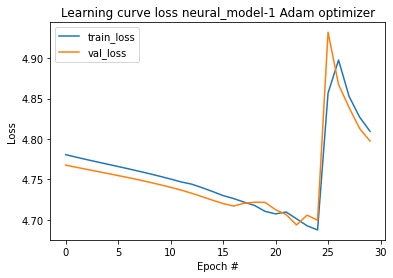

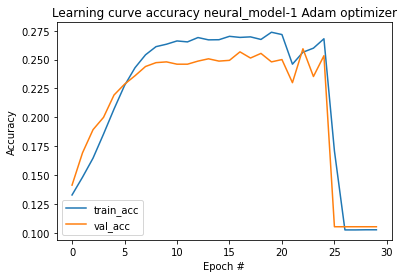

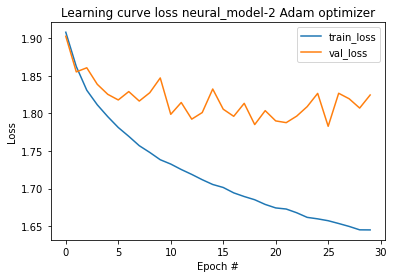

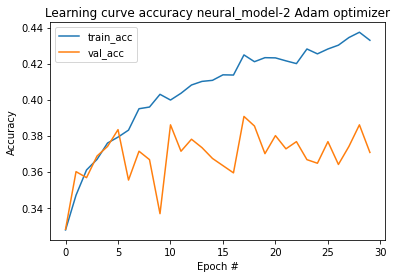

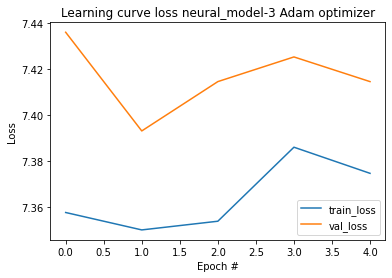

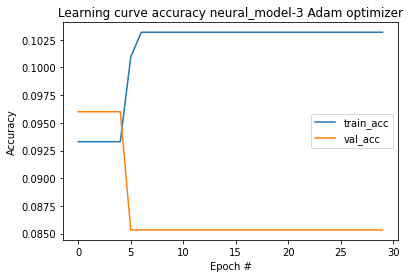

In [86]:
for i in range (0, len(hs_lst)):
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, True, "".join(["neural_model-", str(i + 1), " Adam optimizer"]))
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, False, "".join(["neural_model-", str(i + 1), " Adam optimizer"]))

In [87]:
# between this 3 activation function, soft-plus and softmax are better.
from tensorflow.keras.optimizers import RMSprop
best_models = []
best_models.append(neural_model4)   # activation function softplus
best_models.append(neural_model8)   # activation function softmax

opt = RMSprop(learning_rate = 0.0001)
compileModels(best_models, opt)

In [88]:
history_lst = []
hs_lst = trainModels(best_models, NUM_EPOCHS, BATCH_SIZE, train_X, train_y, (validation_X, validation_y))


Model 1 started training: 

Epoch 1/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7959 - accuracy: 0.1027 - val_loss: 4.7848 - val_accuracy: 0.1053
Epoch 2/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7824 - accuracy: 0.1034 - val_loss: 4.7743 - val_accuracy: 0.1060
Epoch 3/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7721 - accuracy: 0.1046 - val_loss: 4.7651 - val_accuracy: 0.1067
Epoch 4/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7635 - accuracy: 0.1066 - val_loss: 4.7571 - val_accuracy: 0.1113
Epoch 5/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7557 - accuracy: 0.1125 - val_loss: 4.7499 - val_accuracy: 0.1180
Epoch 6/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7485 - accuracy: 0.1195 - val_loss: 4.7433 - val_accuracy: 0.1313
Epoch 7/30
850/850 [==============================] - 1s 1ms/step - loss: 4.7418 - accuracy: 0.1327 - val_loss: 4.7376 

850/850 [==============================] - 1s 1ms/step - loss: 1.5766 - accuracy: 0.4628 - val_loss: 1.7876 - val_accuracy: 0.3900
Epoch 29/30
850/850 [==============================] - 1s 1ms/step - loss: 1.5702 - accuracy: 0.4626 - val_loss: 1.8055 - val_accuracy: 0.3820
Epoch 30/30
850/850 [==============================] - 1s 1ms/step - loss: 1.5678 - accuracy: 0.4667 - val_loss: 1.8131 - val_accuracy: 0.3747


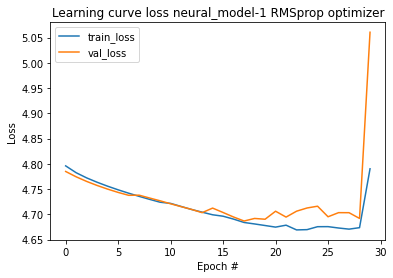

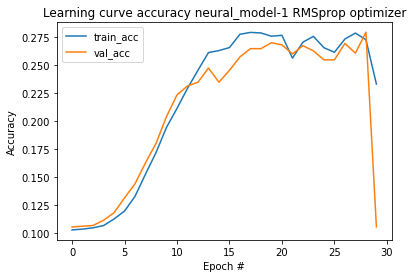

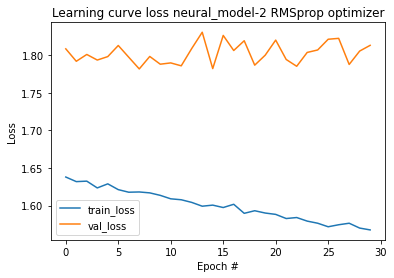

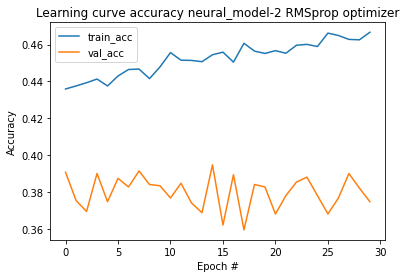

In [89]:
for i in range (0, len(hs_lst)):
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, True, "".join(["neural_model-", str(i + 1), " RMSprop optimizer"]))
    learningCurve_plot(hs_lst[i], NUM_EPOCHS, False, "".join(["neural_model-", str(i + 1), " RMSprop optimizer"]))

## Tuning Model with higher layers:

#### according to the last plots and tests, we are creating the final model and try to tune it.

In [90]:
NUM_EPOCHS = 30
BATCH_SIZE = 30

# ----------- saving some hyperparameters for k-fold cross validation --------------------------------------
info2 = Model_Info(4, (512,256,128, 10), ('relu','relu','relu','softmax'), INPUT_DIM, (Adam(learning_rate = 0.0001)), 
                                       'categorical_crossentropy', ['accuracy'], NUM_EPOCHS, BATCH_SIZE)

info3 = Model_Info(3, (256,128, 10), ('relu','relu','softmax'), INPUT_DIM, (RMSprop(learning_rate = 0.0001)), 
                                       'categorical_crossentropy', ['accuracy'], NUM_EPOCHS, BATCH_SIZE)
# creating info main_model Object
info_mainModel = Model_Info(3, (256,128, 10), ('relu','relu','softmax'), INPUT_DIM, (Adam(learning_rate = 0.0001)), 
                                       'categorical_crossentropy', ['accuracy'], NUM_EPOCHS, BATCH_SIZE)


tune_model = create_neural_Model(info_mainModel.layers, info_mainModel.neurons, info_mainModel.activation_funcs
                                 , info_mainModel.dim,)
tune_model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_81 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_82 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [91]:
tune_model.compile(optimizer = info_mainModel.opt, loss = info_mainModel.loss_func, metrics = info_mainModel.metric)

In [92]:
tune_hs = tune_model.fit(train_X, train_y, batch_size = info_mainModel.batch_size, 
                         epochs = info_mainModel.epochs, validation_data = (validation_X, validation_y))

Epoch 1/30
284/284 [==============================] - 2s 6ms/step - loss: 2.0558 - accuracy: 0.2538 - val_loss: 1.8919 - val_accuracy: 0.3313
Epoch 2/30
284/284 [==============================] - 1s 5ms/step - loss: 1.8756 - accuracy: 0.3286 - val_loss: 1.8605 - val_accuracy: 0.3253
Epoch 3/30
284/284 [==============================] - 1s 5ms/step - loss: 1.8010 - accuracy: 0.3553 - val_loss: 1.8084 - val_accuracy: 0.3513
Epoch 4/30
284/284 [==============================] - 1s 5ms/step - loss: 1.7468 - accuracy: 0.3835 - val_loss: 1.7756 - val_accuracy: 0.3733
Epoch 5/30
284/284 [==============================] - 1s 5ms/step - loss: 1.6987 - accuracy: 0.3992 - val_loss: 1.7509 - val_accuracy: 0.3633
Epoch 6/30
284/284 [==============================] - 1s 5ms/step - loss: 1.6646 - accuracy: 0.4095 - val_loss: 1.7006 - val_accuracy: 0.4133
Epoch 7/30
284/284 [==============================] - 1s 5ms/step - loss: 1.6264 - accuracy: 0.4244 - val_loss: 1.6877 - val_accuracy: 0.3827
Epoch 

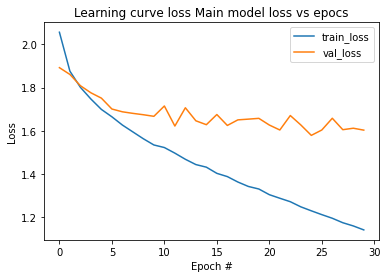

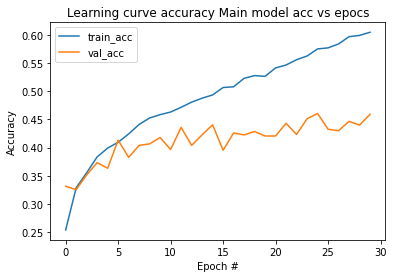

In [93]:
learningCurve_plot(tune_hs, NUM_EPOCHS, True, 'Main model loss vs epocs')
learningCurve_plot(tune_hs, NUM_EPOCHS, False, 'Main model acc vs epocs')

In [94]:
tune_hs.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [95]:
tune_hs.history['accuracy']

[0.25376471877098083,
 0.32858824729919434,
 0.3552941083908081,
 0.3835294246673584,
 0.3991764783859253,
 0.4095294177532196,
 0.4243529438972473,
 0.44117647409439087,
 0.45270588994026184,
 0.45858824253082275,
 0.463294118642807,
 0.4716470539569855,
 0.4808235168457031,
 0.4878823459148407,
 0.4936470687389374,
 0.5068235397338867,
 0.50811767578125,
 0.5231764912605286,
 0.527999997138977,
 0.5267058610916138,
 0.5416470766067505,
 0.5468235015869141,
 0.5562353134155273,
 0.5628235340118408,
 0.5754117369651794,
 0.577294111251831,
 0.5842353105545044,
 0.5971764922142029,
 0.5994117856025696,
 0.6050588488578796]

# Simple Evaluation on DataBatch 1 (tune model):

In [96]:
def create_confusionMatrix(pred, label):     # function that calculates confusion matrix for model.
    confmat = np.zeros((pred.shape[1], pred.shape[1]))
    
    for i in range(y_pred.shape[1]):
        for j in range(y_pred.shape[1]):
            confmat[i, j] = np.sum((pred.argmax(axis=1) == j) * (label.argmax(axis=1) == i))
    
    return confmat

def calculate_metrics(pred, label, X):
    acc_lst = []
    precision_lst = []
    recall_lst = []
    
    for i in range(label.shape[1]):   # for each class we calculate acc, precision, recall
        
        true_positive = np.sum((pred.argmax(axis=1) == i) * (label.argmax(axis=1) == i))
        true_negative = np.sum((pred.argmax(axis=1) != i) * (label.argmax(axis=1) != i))
        false_positive = np.sum((pred.argmax(axis=1) == i) * (label.argmax(axis=1) != i))
        false_negative = np.sum((pred.argmax(axis=1) != i) * (label.argmax(axis=1) == i))

        acc_lst.append( (true_positive + true_negative) / (X.shape[0]) * 100)
        precision_lst.append( true_positive / (true_positive + false_positive) * 100 )
        recall_lst.append( true_positive / (true_positive + false_negative) * 100 )
        
    return acc_lst, precision_lst, recall_lst

In [97]:
y_pred = tune_model.predict(validation_X)

In [98]:
# we show confusion matrix for our tuned model(DataBatch1) to have better undrestanding of work of the model according to the
# class-lables.
cm = create_confusionMatrix(y_pred, validation_y)
print('confusion matrix for first data batch validation:\n')
cm

confusion matrix for first data batch validation:



array([[ 47.,   7.,  10.,   5.,   3.,   6.,   0.,   2.,  34.,  14.],
       [  6.,  57.,   4.,   2.,   4.,  11.,   5.,   5.,  12.,  29.],
       [ 13.,   1.,  86.,   8.,  19.,  23.,   8.,   6.,  11.,   6.],
       [  3.,   0.,  12.,  22.,  16.,  60.,  14.,  11.,   8.,  10.],
       [  5.,   2.,  30.,   3.,  54.,  16.,  10.,  15.,  10.,   3.],
       [  0.,   2.,  15.,  14.,  11.,  69.,   8.,  15.,   3.,   7.],
       [  0.,   1.,  24.,   8.,  17.,  25.,  63.,  13.,   3.,   4.],
       [  5.,   1.,   7.,   1.,  15.,  13.,   3.,  87.,   3.,   8.],
       [ 11.,   3.,   5.,   1.,   2.,   5.,   1.,   3., 103.,  15.],
       [ 10.,   6.,   4.,   2.,   1.,  11.,   2.,   7.,  14., 101.]])

In [99]:
cm.sum()

1500.0

In [100]:
acc, per, recall = calculate_metrics(y_pred, validation_y, validation_X)
for i in range(validation_y.shape[1]):
    print('on label {}, acc={:0.2f}, precision={:0.2f}, recall={:0.2f}'.format(i, acc[i], per[i], recall[i]))

on label 0, acc=91.07, precision=47.00, recall=36.72
on label 1, acc=93.27, precision=71.25, recall=42.22
on label 2, acc=86.27, precision=43.65, recall=47.51
on label 3, acc=88.13, precision=33.33, recall=14.10
on label 4, acc=87.87, precision=38.03, recall=36.49
on label 5, acc=83.67, precision=28.87, recall=47.92
on label 6, acc=90.27, precision=55.26, recall=39.87
on label 7, acc=91.13, precision=53.05, recall=60.84
on label 8, acc=90.40, precision=51.24, recall=69.13
on label 9, acc=89.80, precision=51.27, recall=63.92


## K Fold Cross Validation (data batch 1 train):

In [101]:
from sklearn.model_selection import KFold

acc_scores = {'model1': [], 'model2': [], 'model3': [], 'model4': []}
recall_scores = {'model1': [], 'model2': [], 'model3': [], 'model4': []}

# each element of lists in dict is tuple holding train and validation last itration acc
model_acc_train = {'model1': [], 'model2': [], 'model3': [], 'model4': []}
model_acc_validation = {'model1': [], 'model2': [], 'model3': [], 'model4': []} 

# model_loss = {'model1': [], 'model2': [], 'model3': [], 'model4': []}   

k_split = 5
CV = KFold(n_splits = k_split, shuffle = False)

for train_index, validation_index in CV.split(train_X):
    
    print("Train Index: ", train_index, "\n")
    print("validation Index: ", validation_index)

    X_train, X_val, y_train, y_val = train_X[train_index], train_X[validation_index], train_y[train_index], train_y[validation_index]  # fold partioton.
    
    #---------------- create model in every step of algo -----------------------------
    model1 = create_neural_Model(info1.layers, info1.neurons, info1.activation_funcs
                                 , info1.dim,)
    
    model2 = create_neural_Model(info2.layers, info2.neurons, info2.activation_funcs
                                 , info2.dim,)
    model3 = create_neural_Model(info3.layers, info3.neurons, info3.activation_funcs
                                 , info3.dim,)
    
    model4 = create_neural_Model(info_mainModel.layers, info_mainModel.neurons, info_mainModel.activation_funcs
                                 , info_mainModel.dim,)
    
    #---------------- compile model in every step of algo -----------------------------
    model1.compile(optimizer = info1.opt, loss = info1.loss_func, metrics = info1.metric)
    model2.compile(optimizer = info2.opt, loss = info2.loss_func, metrics = info2.metric)
    model3.compile(optimizer = info3.opt, loss = info3.loss_func, metrics = info3.metric)
    model4.compile(optimizer = info_mainModel.opt, loss = info_mainModel.loss_func, metrics = info_mainModel.metric)
    
    #--------------- train models in fold k --------------------------------------------
    hs1 = model1.fit(X_train, y_train, batch_size = info1.batch_size, 
                         epochs = info1.epochs, validation_data = (X_val, y_val))   
    
    hs2 = model2.fit(X_train, y_train, batch_size = info2.batch_size, 
                         epochs = info2.epochs, validation_data = (X_val, y_val)) 
    
    hs3 = model3.fit(X_train, y_train, batch_size = info3.batch_size, 
                         epochs = info3.epochs, validation_data = (X_val, y_val))
    
    hs4 = model4.fit(X_train, y_train, batch_size = info_mainModel.batch_size, 
                         epochs = info_mainModel.epochs, validation_data = (X_val, y_val))
    #--------------- evaluate models according to thair predections --------------------
    
    y_pred1 = model1.predict(X_val)
    y_pred2 = model2.predict(X_val)
    y_pred3 = model3.predict(X_val)
    y_pred4 = model4.predict(X_val)
    
    model_acc1, model_precision1, model_recall1 = calculate_metrics(y_pred1, y_val, X_val)
    model_acc2, model_precision2, model_recall2 = calculate_metrics(y_pred2, y_val, X_val)
    model_acc3, model_precision3, model_recall3 = calculate_metrics(y_pred3, y_val, X_val)
    model_acc4, model_precision4, model_recall4 = calculate_metrics(y_pred4, y_val, X_val)
    
    acc_scores['model1'].append(np.mean(model_acc1))
    acc_scores['model2'].append(np.mean(model_acc2))
    acc_scores['model3'].append(np.mean(model_acc3))
    acc_scores['model4'].append(np.mean(model_acc4))
    
    recall_scores['model1'].append(np.mean(model_recall1))
    recall_scores['model2'].append(np.mean(model_recall2))
    recall_scores['model3'].append(np.mean(model_recall3))
    recall_scores['model4'].append(np.mean(model_recall4))
    
    # saving the last train accuracy of model in kth itration of k-fold cross validation.
    model_acc_train['model1'].append( hs1.history['accuracy'][info1.epochs-1] )
    model_acc_train['model2'].append( hs2.history['accuracy'][info2.epochs-1] )
    model_acc_train['model3'].append( hs3.history['accuracy'][info3.epochs-1] )
    model_acc_train['model4'].append( hs4.history['accuracy'][info_mainModel.epochs-1] )
    
    # saving the last validation accuracy of model in kth itration of k-fold cross validation.
    model_acc_validation['model1'].append( hs1.history['val_accuracy'][info1.epochs-1] )
    model_acc_validation['model2'].append( hs2.history['val_accuracy'][info2.epochs-1] )
    model_acc_validation['model3'].append( hs3.history['val_accuracy'][info3.epochs-1] )
    model_acc_validation['model4'].append( hs3.history['val_accuracy'][info_mainModel.epochs-1] )

Train Index:  [1700 1701 1702 ... 8497 8498 8499] 

validation Index:  [   0    1    2 ... 1697 1698 1699]
Epoch 1/30
680/680 [==============================] - 1s 1ms/step - loss: 2.3232 - accuracy: 0.1138 - val_loss: 2.2957 - val_accuracy: 0.1365
Epoch 2/30
680/680 [==============================] - 1s 1ms/step - loss: 2.2646 - accuracy: 0.1441 - val_loss: 2.2524 - val_accuracy: 0.1518
Epoch 3/30
680/680 [==============================] - 1s 1ms/step - loss: 2.2237 - accuracy: 0.1760 - val_loss: 2.2178 - val_accuracy: 0.1776
Epoch 4/30
680/680 [==============================] - 1s 1ms/step - loss: 2.1902 - accuracy: 0.2001 - val_loss: 2.1880 - val_accuracy: 0.1953
Epoch 5/30
680/680 [==============================] - 1s 1ms/step - loss: 2.1613 - accuracy: 0.2190 - val_loss: 2.1625 - val_accuracy: 0.2229
Epoch 6/30
680/680 [==============================] - 1s 1ms/step - loss: 2.1366 - accuracy: 0.2334 - val_loss: 2.1451 - val_accuracy: 0.2259
Epoch 7/30
680/680 [=====================

227/227 [==============================] - 2s 8ms/step - loss: 1.0055 - accuracy: 0.6568 - val_loss: 1.6473 - val_accuracy: 0.4376
Epoch 28/30
227/227 [==============================] - 2s 8ms/step - loss: 0.9768 - accuracy: 0.6604 - val_loss: 1.6501 - val_accuracy: 0.4329
Epoch 29/30
227/227 [==============================] - 2s 8ms/step - loss: 0.9504 - accuracy: 0.6754 - val_loss: 1.6627 - val_accuracy: 0.4265
Epoch 30/30
227/227 [==============================] - 2s 8ms/step - loss: 0.9333 - accuracy: 0.6853 - val_loss: 1.6915 - val_accuracy: 0.4276
Epoch 1/30
227/227 [==============================] - 2s 9ms/step - loss: 2.0807 - accuracy: 0.2359 - val_loss: 1.9498 - val_accuracy: 0.3212
Epoch 2/30
227/227 [==============================] - 2s 8ms/step - loss: 1.9018 - accuracy: 0.3153 - val_loss: 1.8968 - val_accuracy: 0.3229
Epoch 3/30
227/227 [==============================] - 2s 8ms/step - loss: 1.8246 - accuracy: 0.3440 - val_loss: 1.8290 - val_accuracy: 0.3571
Epoch 4/30
227

227/227 [==============================] - 1s 5ms/step - loss: 1.4223 - accuracy: 0.5038 - val_loss: 1.6692 - val_accuracy: 0.3994
Epoch 25/30
227/227 [==============================] - 1s 6ms/step - loss: 1.4083 - accuracy: 0.5112 - val_loss: 1.6420 - val_accuracy: 0.4194
Epoch 26/30
227/227 [==============================] - 1s 6ms/step - loss: 1.3961 - accuracy: 0.5154 - val_loss: 1.6751 - val_accuracy: 0.3976
Epoch 27/30
227/227 [==============================] - 1s 5ms/step - loss: 1.3843 - accuracy: 0.5196 - val_loss: 1.6345 - val_accuracy: 0.4329
Epoch 28/30
227/227 [==============================] - 1s 6ms/step - loss: 1.3714 - accuracy: 0.5232 - val_loss: 1.6284 - val_accuracy: 0.4247
Epoch 29/30
227/227 [==============================] - 1s 6ms/step - loss: 1.3642 - accuracy: 0.5207 - val_loss: 1.6351 - val_accuracy: 0.4224
Epoch 30/30
227/227 [==============================] - 1s 6ms/step - loss: 1.3510 - accuracy: 0.5266 - val_loss: 1.6248 - val_accuracy: 0.4300
Train Index

Epoch 21/30
227/227 [==============================] - 2s 9ms/step - loss: 1.2945 - accuracy: 0.5382 - val_loss: 1.6376 - val_accuracy: 0.4247
Epoch 22/30
227/227 [==============================] - 2s 9ms/step - loss: 1.2771 - accuracy: 0.5488 - val_loss: 1.6309 - val_accuracy: 0.4359
Epoch 23/30
227/227 [==============================] - 2s 9ms/step - loss: 1.2527 - accuracy: 0.5575 - val_loss: 1.6439 - val_accuracy: 0.4318
Epoch 24/30
227/227 [==============================] - 2s 9ms/step - loss: 1.2345 - accuracy: 0.5666 - val_loss: 1.6277 - val_accuracy: 0.4359
Epoch 25/30
227/227 [==============================] - 2s 9ms/step - loss: 1.2131 - accuracy: 0.5687 - val_loss: 1.6280 - val_accuracy: 0.4476
Epoch 26/30
227/227 [==============================] - 2s 8ms/step - loss: 1.1886 - accuracy: 0.5869 - val_loss: 1.6356 - val_accuracy: 0.4412
Epoch 27/30
227/227 [==============================] - 2s 9ms/step - loss: 1.1756 - accuracy: 0.5837 - val_loss: 1.6235 - val_accuracy: 0.4400

227/227 [==============================] - 1s 5ms/step - loss: 1.4548 - accuracy: 0.4874 - val_loss: 1.6642 - val_accuracy: 0.4241
Epoch 19/30
227/227 [==============================] - 1s 6ms/step - loss: 1.4420 - accuracy: 0.4984 - val_loss: 1.6717 - val_accuracy: 0.4324
Epoch 20/30
227/227 [==============================] - 1s 6ms/step - loss: 1.4276 - accuracy: 0.4975 - val_loss: 1.6736 - val_accuracy: 0.4100
Epoch 21/30
227/227 [==============================] - 1s 5ms/step - loss: 1.4226 - accuracy: 0.4996 - val_loss: 1.6555 - val_accuracy: 0.4329
Epoch 22/30
227/227 [==============================] - 1s 6ms/step - loss: 1.4018 - accuracy: 0.5101 - val_loss: 1.6720 - val_accuracy: 0.4071
Epoch 23/30
227/227 [==============================] - 1s 5ms/step - loss: 1.3907 - accuracy: 0.5119 - val_loss: 1.6649 - val_accuracy: 0.4212
Epoch 24/30
227/227 [==============================] - 1s 5ms/step - loss: 1.3787 - accuracy: 0.5159 - val_loss: 1.6408 - val_accuracy: 0.4276
Epoch 25/30

Epoch 15/30
227/227 [==============================] - 2s 8ms/step - loss: 1.4057 - accuracy: 0.4974 - val_loss: 1.6572 - val_accuracy: 0.4012
Epoch 16/30
227/227 [==============================] - 2s 8ms/step - loss: 1.3739 - accuracy: 0.5113 - val_loss: 1.6451 - val_accuracy: 0.4124
Epoch 17/30
227/227 [==============================] - 2s 8ms/step - loss: 1.3542 - accuracy: 0.5159 - val_loss: 1.6219 - val_accuracy: 0.4206
Epoch 18/30
227/227 [==============================] - 2s 8ms/step - loss: 1.3319 - accuracy: 0.5337 - val_loss: 1.6722 - val_accuracy: 0.4018
Epoch 19/30
227/227 [==============================] - 2s 8ms/step - loss: 1.3110 - accuracy: 0.5375 - val_loss: 1.6439 - val_accuracy: 0.3994
Epoch 20/30
227/227 [==============================] - 2s 9ms/step - loss: 1.3002 - accuracy: 0.5388 - val_loss: 1.6436 - val_accuracy: 0.4082
Epoch 21/30
227/227 [==============================] - 2s 8ms/step - loss: 1.2722 - accuracy: 0.5528 - val_loss: 1.6089 - val_accuracy: 0.4153

227/227 [==============================] - 1s 6ms/step - loss: 1.6031 - accuracy: 0.4424 - val_loss: 1.7276 - val_accuracy: 0.3841
Epoch 13/30
227/227 [==============================] - 1s 6ms/step - loss: 1.5831 - accuracy: 0.4513 - val_loss: 1.7043 - val_accuracy: 0.3912
Epoch 14/30
227/227 [==============================] - 1s 5ms/step - loss: 1.5740 - accuracy: 0.4579 - val_loss: 1.6931 - val_accuracy: 0.3953
Epoch 15/30
227/227 [==============================] - 1s 6ms/step - loss: 1.5508 - accuracy: 0.4582 - val_loss: 1.6940 - val_accuracy: 0.3988
Epoch 16/30
227/227 [==============================] - 1s 5ms/step - loss: 1.5417 - accuracy: 0.4666 - val_loss: 1.7055 - val_accuracy: 0.3941
Epoch 17/30
227/227 [==============================] - 1s 5ms/step - loss: 1.5283 - accuracy: 0.4679 - val_loss: 1.6910 - val_accuracy: 0.3935
Epoch 18/30
227/227 [==============================] - 1s 5ms/step - loss: 1.5081 - accuracy: 0.4785 - val_loss: 1.6828 - val_accuracy: 0.4006
Epoch 19/30

227/227 [==============================] - 2s 8ms/step - loss: 1.6103 - accuracy: 0.4238 - val_loss: 1.6828 - val_accuracy: 0.3994
Epoch 9/30
227/227 [==============================] - 2s 8ms/step - loss: 1.5818 - accuracy: 0.4418 - val_loss: 1.6650 - val_accuracy: 0.3947
Epoch 10/30
227/227 [==============================] - 2s 8ms/step - loss: 1.5515 - accuracy: 0.4465 - val_loss: 1.6673 - val_accuracy: 0.3835
Epoch 11/30
227/227 [==============================] - 2s 8ms/step - loss: 1.5293 - accuracy: 0.4582 - val_loss: 1.6693 - val_accuracy: 0.3929
Epoch 12/30
227/227 [==============================] - 2s 8ms/step - loss: 1.5050 - accuracy: 0.4678 - val_loss: 1.6384 - val_accuracy: 0.4035
Epoch 13/30
227/227 [==============================] - 2s 8ms/step - loss: 1.4866 - accuracy: 0.4699 - val_loss: 1.6595 - val_accuracy: 0.3894
Epoch 14/30
227/227 [==============================] - 2s 8ms/step - loss: 1.4537 - accuracy: 0.4812 - val_loss: 1.6485 - val_accuracy: 0.4000
Epoch 15/30


227/227 [==============================] - 1s 6ms/step - loss: 1.7299 - accuracy: 0.3878 - val_loss: 1.7821 - val_accuracy: 0.3665
Epoch 6/30
227/227 [==============================] - 1s 6ms/step - loss: 1.6946 - accuracy: 0.3990 - val_loss: 1.7606 - val_accuracy: 0.3559
Epoch 7/30
227/227 [==============================] - 1s 6ms/step - loss: 1.6740 - accuracy: 0.4093 - val_loss: 1.7381 - val_accuracy: 0.3706
Epoch 8/30
227/227 [==============================] - 1s 6ms/step - loss: 1.6447 - accuracy: 0.4228 - val_loss: 1.7647 - val_accuracy: 0.3512
Epoch 9/30
227/227 [==============================] - 1s 6ms/step - loss: 1.6236 - accuracy: 0.4309 - val_loss: 1.7517 - val_accuracy: 0.3588
Epoch 10/30
227/227 [==============================] - 1s 6ms/step - loss: 1.6051 - accuracy: 0.4360 - val_loss: 1.6851 - val_accuracy: 0.3994
Epoch 11/30
227/227 [==============================] - 1s 6ms/step - loss: 1.5846 - accuracy: 0.4446 - val_loss: 1.6890 - val_accuracy: 0.3924
Epoch 12/30
227

Epoch 2/30
227/227 [==============================] - 2s 9ms/step - loss: 1.8894 - accuracy: 0.3169 - val_loss: 1.8352 - val_accuracy: 0.3353
Epoch 3/30
227/227 [==============================] - 2s 9ms/step - loss: 1.8174 - accuracy: 0.3516 - val_loss: 1.7749 - val_accuracy: 0.3571
Epoch 4/30
227/227 [==============================] - 2s 9ms/step - loss: 1.7614 - accuracy: 0.3701 - val_loss: 1.7913 - val_accuracy: 0.3618
Epoch 5/30
227/227 [==============================] - 2s 9ms/step - loss: 1.7173 - accuracy: 0.3850 - val_loss: 1.7384 - val_accuracy: 0.3771
Epoch 6/30
227/227 [==============================] - 2s 8ms/step - loss: 1.6710 - accuracy: 0.4034 - val_loss: 1.7105 - val_accuracy: 0.3841
Epoch 7/30
227/227 [==============================] - 2s 8ms/step - loss: 1.6351 - accuracy: 0.4166 - val_loss: 1.6919 - val_accuracy: 0.3959
Epoch 8/30
227/227 [==============================] - 2s 9ms/step - loss: 1.6028 - accuracy: 0.4278 - val_loss: 1.6906 - val_accuracy: 0.3841
Epoch 

227/227 [==============================] - 2s 9ms/step - loss: 1.2088 - accuracy: 0.5737 - val_loss: 1.7248 - val_accuracy: 0.4088
Epoch 30/30
227/227 [==============================] - 2s 9ms/step - loss: 1.1902 - accuracy: 0.5894 - val_loss: 1.5996 - val_accuracy: 0.4471
Epoch 1/30
227/227 [==============================] - 2s 7ms/step - loss: 2.0837 - accuracy: 0.2344 - val_loss: 1.9316 - val_accuracy: 0.2912
Epoch 2/30
227/227 [==============================] - 1s 6ms/step - loss: 1.9030 - accuracy: 0.3091 - val_loss: 1.8520 - val_accuracy: 0.3359
Epoch 3/30
227/227 [==============================] - 1s 6ms/step - loss: 1.8369 - accuracy: 0.3500 - val_loss: 1.8239 - val_accuracy: 0.3541
Epoch 4/30
227/227 [==============================] - 1s 6ms/step - loss: 1.8007 - accuracy: 0.3587 - val_loss: 1.7892 - val_accuracy: 0.3800
Epoch 5/30
227/227 [==============================] - 1s 6ms/step - loss: 1.7647 - accuracy: 0.3850 - val_loss: 1.7983 - val_accuracy: 0.3612
Epoch 6/30
227/2

### Mean of class label accuracy and recall for each model in k fold cross validation:

In [102]:
acc_scores

{'model1': [86.35294117647058,
  86.2,
  86.4470588235294,
  86.64705882352942,
  86.45882352941176],
 'model2': [88.55294117647058,
  88.75294117647059,
  88.6,
  88.74117647058824,
  88.50588235294117],
 'model3': [88.14117647058825,
  88.65882352941176,
  88.18823529411763,
  87.90588235294118,
  88.94117647058823],
 'model4': [88.6,
  88.56470588235295,
  88.3294117647059,
  88.2235294117647,
  88.4235294117647]}

In [103]:
recall_scores

{'model1': [31.79727238885163,
  30.52494235357609,
  32.36581060245881,
  33.35437814054362,
  32.512490620882545],
 'model2': [42.27498534860794,
  43.52562603239943,
  43.299811511645984,
  44.04428178944865,
  42.833660407335195],
 'model3': [39.948156399570344,
  42.91367498962025,
  41.39607999431611,
  40.27568227008423,
  44.24384612846528],
 'model4': [42.265057041629795,
  42.45623564286235,
  41.830525469298735,
  41.23298226814973,
  42.07045457153769]}

In [104]:
avg_dict = {'model1': 0, 'model2': 0, 
               'model3': 0, 'model4': 0}

# ------------------------ calculating accuracy for every model.
for key in acc_scores.keys():
    avg_dict[key] = np.mean(acc_scores[key])

# printing the best model according to their k-fold cross validations mean.
avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'model1': 86.42117647058822,
 'model3': 88.3670588235294,
 'model4': 88.42823529411766,
 'model2': 88.63058823529411}

In [105]:
avg_dict = {'model1': 0, 'model2': 0, 
               'model3': 0, 'model4': 0}

# ------------------------ calculating accuracy for every model.
for key in recall_scores.keys():
    avg_dict[key] = np.mean(recall_scores[key])

# printing the best model according to their k-fold cross validations mean.
avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'model1': 32.11097882126254,
 'model3': 41.755487956411244,
 'model4': 41.97105099869566,
 'model2': 43.19567301788744}

### Comparing model train accuracy and validation accuracy:

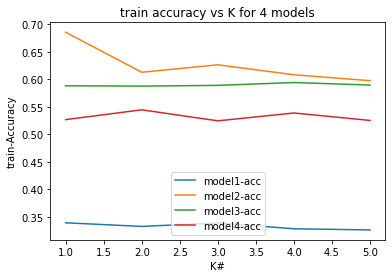

In [106]:

plt.plot(np.arange(1, k_split + 1), model_acc_train["model1"], label="model1-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_train["model2"], label="model2-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_train["model3"], label="model3-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_train["model4"], label="model4-acc")

plt.title("train accuracy vs K for 4 models")
plt.xlabel("K#")
plt.ylabel("train-Accuracy")
plt.legend()

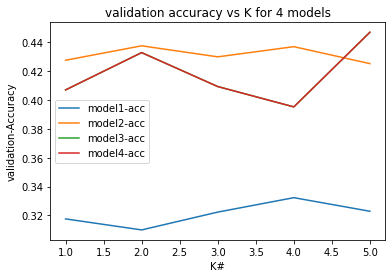

In [107]:
plt.plot(np.arange(1, k_split + 1), model_acc_validation["model1"], label="model1-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_validation["model2"], label="model2-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_validation["model3"], label="model3-acc")
plt.plot(np.arange(1, k_split + 1), model_acc_validation["model4"], label="model4-acc")

plt.title("validation accuracy vs K for 4 models")
plt.xlabel("K#")
plt.ylabel("validation-Accuracy")
plt.legend()

In [108]:
# avg of models in k-fold for training set

avg_dict = {'model1': 0, 'model2': 0, 
               'model3': 0, 'model4': 0}

for key in model_acc_train.keys():
    avg_dict[key] = np.mean(model_acc_train[key])

# sorting keys(model names) according to values
avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'model1': 0.3331176519393921,
 'model4': 0.5318529486656189,
 'model3': 0.5895588159561157,
 'model2': 0.6259117603302002}

In [109]:
# avg of models in k-fold for validation set

avg_dict = {'model1': 0, 'model2': 0, 
               'model3': 0, 'model4': 0}

for key in model_acc_validation.keys():
    avg_dict[key] = np.mean(model_acc_validation[key])
    
# sorting keys(model names) according to values    
avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'model1': 0.3210588276386261,
 'model3': 0.41835294365882875,
 'model4': 0.41835294365882875,
 'model2': 0.4315294146537781}

## Train model with Tuned parameters with all data:

### Data Preprocessing on All train set:

In [110]:

all_trainData_X, all_trainData_y = unison_shuffle(all_trainData_X, all_trainData_y)
all_trainData_X = normalizeData(all_trainData_X)    # normalize the train data.
all_trainData_y = oneHotEncode(all_trainData_y)    # one-hot encoding

# printing 5 samples(each 32 * 32 * 3) from all bathces train.
print('normalized all_data batches:\n', all_trainData_X[:5])   
print('\none hot encoded lables:\n', trainBatch1_y[:5])

normalized all_data batches:
 [[0.2        0.17647059 0.18823529 ... 0.28627451 0.18823529 0.19607843]
 [0.49019608 0.66666667 0.69803922 ... 0.25098039 0.24313725 0.24705882]
 [0.37254902 0.36078431 0.38431373 ... 0.55686275 0.54901961 0.54901961]
 [0.34509804 0.32941176 0.31764706 ... 0.42745098 0.44705882 0.44705882]
 [0.97647059 0.96862745 0.97647059 ... 0.03137255 0.04313725 0.05882353]]

one hot encoded lables:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Loading test data set from batch file:

In [111]:
test_batch = unpickle('../CIFAR10/cifar-10-batches-py/test_batch')
test_X = test_batch['data']
test_y = np.array(test_batch['labels'])   # converting list to np array.

print("All test feature data: ")
print(test_X)
print("\ntest_X data shape: ", test_X.shape)

print("\nAll test labels togather: ")
print(test_y)
print("\ntest_y data shape: ", test_y.shape)

#----------------- preprocess test data -----------------
test_X, test_y = unison_shuffle(test_X, test_y)
test_X = normalizeData(test_X)    # normalize the train data.
test_y = oneHotEncode(test_y)    # one-hot encoding

print('\nnormalized testBatch:\n', test_X[:5])   # printing 5 sampels of test data.
print('\none hot encoded lables:\n', test_y[:5])

All test feature data: 
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]

test_X data shape:  (10000, 3072)

All test labels togather: 
[3 8 8 ... 5 1 7]

test_y data shape:  (10000,)

normalized testBatch:
 [[0.30588235 0.38823529 0.45490196 ... 0.57647059 0.57254902 0.57254902]
 [0.17647059 0.15686275 0.17647059 ... 0.54901961 0.54509804 0.54509804]
 [0.59215686 0.54509804 0.54117647 ... 0.32156863 0.34509804 0.32941176]
 [0.88235294 0.8745098  0.8745098  ... 0.84313725 0.84313725 0.85098039]
 [0.02352941 0.03529412 0.01960784 ... 0.14901961 0.08235294 0.14117647]]

one hot encoded lables:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Train main_model with whole CIFAR dataset:

In [112]:
main_model = create_neural_Model(info2.layers, info2.neurons, info2.activation_funcs
                                 , info2.dim,)
main_model.compile(optimizer = info2.opt, loss = info2.loss_func, metrics = info2.metric)

main_hs = main_model.fit(all_trainData_X, all_trainData_y, batch_size = info2.batch_size, 
                         epochs = info2.epochs, validation_data = (test_X, test_y))

Epoch 1/30
1667/1667 [==============================] - 17s 10ms/step - loss: 1.8289 - accuracy: 0.3424 - val_loss: 1.6749 - val_accuracy: 0.3999
Epoch 2/30
1667/1667 [==============================] - 16s 10ms/step - loss: 1.6518 - accuracy: 0.4119 - val_loss: 1.6025 - val_accuracy: 0.4332
Epoch 3/30
1667/1667 [==============================] - 16s 10ms/step - loss: 1.5744 - accuracy: 0.4411 - val_loss: 1.5539 - val_accuracy: 0.4547
Epoch 4/30
1667/1667 [==============================] - 15s 9ms/step - loss: 1.5176 - accuracy: 0.4611 - val_loss: 1.5019 - val_accuracy: 0.4649
Epoch 5/30
1667/1667 [==============================] - 16s 9ms/step - loss: 1.4771 - accuracy: 0.4763 - val_loss: 1.4775 - val_accuracy: 0.4789
Epoch 6/30
1667/1667 [==============================] - 16s 9ms/step - loss: 1.4392 - accuracy: 0.4893 - val_loss: 1.4976 - val_accuracy: 0.4684
Epoch 7/30
1667/1667 [==============================] - 16s 9ms/step - loss: 1.4107 - accuracy: 0.5019 - val_loss: 1.4436 - val

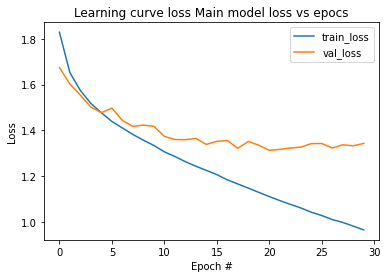

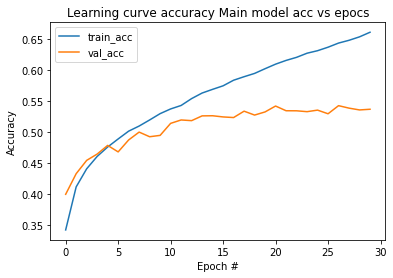

In [113]:
learningCurve_plot(main_hs, NUM_EPOCHS, True, 'Main model loss vs epocs')
learningCurve_plot(main_hs, NUM_EPOCHS, False, 'Main model acc vs epocs')

## Final evaluation of model:

In [114]:
y_pred = main_model.predict(test_X)

cm = create_confusionMatrix(y_pred, test_y)
print('confusion matrix for final model:\n')
cm 

confusion matrix for final model:



array([[601.,  20.,  63.,  17.,  40.,  34.,  19.,  29.,  87.,  90.],
       [ 35., 543.,  17.,  18.,   9.,  22.,  20.,  25.,  60., 251.],
       [ 72.,   5., 422.,  60., 118., 123.,  91.,  70.,  12.,  27.],
       [ 22.,  11.,  79., 305.,  44., 299., 113.,  52.,  23.,  52.],
       [ 38.,   4., 129.,  61., 421.,  77., 134.,  90.,  22.,  24.],
       [ 15.,   5.,  75., 168.,  52., 512.,  62.,  62.,  14.,  35.],
       [  7.,   7.,  65.,  76.,  87.,  81., 617.,  16.,  12.,  32.],
       [ 27.,   6.,  37.,  48.,  71., 108.,  22., 614.,   9.,  58.],
       [109.,  47.,  16.,  18.,  23.,  34.,   8.,  19., 618., 108.],
       [ 28.,  92.,   7.,  24.,   9.,  35.,  12.,  34.,  39., 720.]])

In [115]:
cm.sum()

10000.0

In [116]:
acc, per, recall = calculate_metrics(y_pred, test_y, test_X)
for i in range(test_y.shape[1]):
    print('on label {}, acc={:0.2f}, precision={:0.2f}, recall={:0.2f}'.format(i, acc[i], per[i], recall[i]))

on label 0, acc=92.48, precision=63.00, recall=60.10
on label 1, acc=93.46, precision=73.38, recall=54.30
on label 2, acc=89.34, precision=46.37, recall=42.20
on label 3, acc=88.15, precision=38.36, recall=30.50
on label 4, acc=89.68, precision=48.17, recall=42.10
on label 5, acc=86.99, precision=38.64, recall=51.20
on label 6, acc=91.36, precision=56.19, recall=61.70
on label 7, acc=92.17, precision=60.73, recall=61.40
on label 8, acc=93.40, precision=68.97, recall=61.80
on label 9, acc=90.43, precision=51.54, recall=72.00
